# Olympiad Smoking Explotary Data Analysis

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


## Functions

In [3]:
def outliers(df,x):
    q1 = np.percentile(df[x], 25)
    q3 = np.percentile(df[x], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = [x for x in df[x] if x < lower_bound or x > upper_bound]
    return outliers

def df_without_outliers(df,x):
    q1 = np.percentile(df[x], 25)
    q3 = np.percentile(df[x], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    wo_outliers = df[(df[x]>=lower_bound) & (df[x]<=upper_bound)]
    return wo_outliers

## Exploratory Data Analysis

#### Data

In [4]:
# Dataframe head and shape

df=pd.read_csv('train.csv')
print('The dataframe has ',df.shape[0],' rows and ',df.shape[1],' columns')
print(df.info())
df.head()

The dataframe has  159256  rows and  24  columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [24]:
df.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
BMI                    0
BMI_Cat                0
Hipertension           0
Cholesterol_Cat        0
LDL_Cat                0
HDL_Cat                0
triglyceride_Cat       0
Anemic                 0
dtype: int64

In [25]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,Anemic
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306651,165.266929,67.143687,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365,24.452832,0.118338
std,45973.391572,11.842315,8.818941,12.586240,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063,3.368652,0.323009
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,11.718750,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,22.222222,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,24.221453,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000,26.159334,0.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000,45.785640,1.000000


<AxesSubplot: xlabel='smoking', ylabel='Cantidad'>

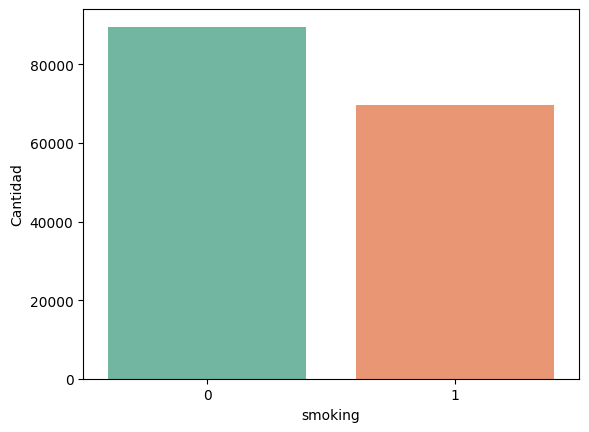

In [23]:
# Variable objetivo
sns.barplot(x='smoking',y='Cantidad',data=df.groupby('smoking')['id'].count().reset_index().rename(columns={'id':'Cantidad'}),palette='Set2')

### Feature Engineering

En este dataset, las variables age, height(cm), weight(kg), waist(cm) son variables discretas y estan agrupadas en un rango de 5. A pesar de esto, hay algunos datos que no pertenecen a ninguno de los grupos de 5. Debido a esto, asumimos que es un error de tipeo y las agrupamos con el múltiplo de 5 que posean más cerca.

In [6]:
var_div5=['age','weight(kg)','height(cm)']
print('Valores unicos fuera del rango:\n')
for var in var_div5:
    #df[var][df[var]%5!=0]=df[var][df[var]%5!=0].apply(lambda x:round(x/5)*5)
    print('-----------\n',var.upper(),'\n-----------')
    non_div5=list()
    for i in df[var].unique():
        if i%5!=0:
            non_div5.append(i)
    print('Cantidad: ',len(non_div5),'\n')

Valores unicos fuera del rango:

-----------
 AGE 
-----------
Cantidad:  4 

-----------
 WEIGHT(KG) 
-----------
Cantidad:  7 

-----------
 HEIGHT(CM) 
-----------
Cantidad:  2 



Los reemplazamos por el valor mas cercano que sea divisible por 5 y confirmamos que no existan valores que no sean divisibles por 5.


In [7]:
for var in var_div5:
    df[var][df[var]%5!=0]=df[var][df[var]%5!=0].apply(lambda x:round(x/5)*5)
    
print('Valores unicos fuera del rango:\n')
for var in var_div5:
    #df[var][df[var]%5!=0]=df[var][df[var]%5!=0].apply(lambda x:round(x/5)*5)
    print('-----------\n',var.upper(),'\n-----------')
    non_div5=list()
    for i in df[var].unique():
        if i%5!=0:
            non_div5.append(i)
    print('Cantidad: ',len(non_div5),'\n')

Valores unicos fuera del rango:

-----------
 AGE 
-----------
Cantidad:  0 

-----------
 WEIGHT(KG) 
-----------
Cantidad:  0 

-----------
 HEIGHT(CM) 
-----------
Cantidad:  0 



C:\Users\Manuel\AppData\Local\Temp\ipykernel_4836\2661794046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var][df[var]%5!=0]=df[var][df[var]%5!=0].apply(lambda x:round(x/5)*5)


Creamos nuevas variables categoricas: BMI, Hipertension, Colesterol y Anemia.

#### BMI

In [8]:
df['BMI']=df['weight(kg)']/(df['height(cm)']/100)**2

df['BMI_Cat']=df['BMI'].apply(lambda x: 'Underweight' if x<18.5 else #
                'Normal' if x>=18.5 and x<25 else
                'Overweight' if x>=25 and x<30 else
                'Obese G1' if x>=30 and x<35 else
                'Obese G2' if x>=35 and x<40 else
                'Obese G3')
df.head()

# df['BMI_Cat']=df['BMI'].apply(lambda x: 0 if x<18.5 else #Underweight
#                 1 if x>=18.5 and x<25 else #'Normal'
#                 2 if x>=25 and x<30 else #'Overweight'
#                 3 if x>=30 and x<35 else #'Obese G1'
#                 4 if x>=35 and x<40 else #'Obese G2'
#                 5) #'Obese G3'
# df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,BMI_Cat
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,16.5,1,1.0,22,25,27,0,1,22.038567,Normal
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,16.2,1,1.1,27,23,37,1,0,23.875115,Normal
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,17.4,1,0.8,27,31,53,0,1,25.951557,Overweight
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,15.9,1,1.0,20,27,30,1,0,29.320988,Overweight
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,15.4,1,0.8,19,13,17,0,1,22.038567,Normal


#### Hipertension

In [9]:
df['Hipertension']=df['systolic'].apply(lambda x: 'Normal' if x<120 else
                'Elevated' if x>=120 and x<130 else
                'Alta G1' if x>=130 and x<140 else
                'Alta G2' if x>=140 and x<180 else
                'Emergencia')

df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,BMI_Cat,Hipertension
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,1,1.0,22,25,27,0,1,22.038567,Normal,Alta G1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,1,1.1,27,23,37,1,0,23.875115,Normal,Alta G2
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,1,0.8,27,31,53,0,1,25.951557,Overweight,Normal
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,1,1.0,20,27,30,1,0,29.320988,Overweight,Alta G1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,1,0.8,19,13,17,0,1,22.038567,Normal,Elevated


#### Colesterol


In [10]:
df['Cholesterol_Cat']=df['Cholesterol'].apply(lambda x: 'Optimo' if x<200 else
                'Limite' if x>=200 and x<240 else
                'Alto')

df['LDL_Cat']=df['LDL'].apply(lambda x: 'Optimo' if x<100 else
                'Casi Optimo' if x>=100 and x<130 else
                'Limite' if x>=130 and x<160 else
                'Alto' if x>=160 and x<190 else
                'Muy Alto')

df['HDL_Cat']=df['HDL'].apply(lambda x: 'Optimo' if x>=60 else
                'Normal' if x>=40 and x<60 else
                'Muy Malo') 

df['triglyceride_Cat']=df['triglyceride'].apply(lambda x: 'Optimo' if x<150 else
                'Normal' if x>=150 and x<200 else
                'Alto')

df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Gtp,dental caries,smoking,BMI,BMI_Cat,Hipertension,Cholesterol_Cat,LDL_Cat,HDL_Cat,triglyceride_Cat
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,27,0,1,22.038567,Normal,Alta G1,Optimo,Optimo,Normal,Alto
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,37,1,0,23.875115,Normal,Alta G2,Optimo,Casi Optimo,Normal,Optimo
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,53,0,1,25.951557,Overweight,Normal,Optimo,Optimo,Normal,Normal
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,30,1,0,29.320988,Overweight,Alta G1,Optimo,Casi Optimo,Muy Malo,Alto
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,17,0,1,22.038567,Normal,Elevated,Optimo,Optimo,Normal,Optimo


#### Anemicos

In [11]:
df.hemoglobin.median()

15.0

In [12]:
df['Anemic']=df['hemoglobin'].apply(lambda x: 0 if x>13 else
                1)

### Variables Discretas

In [13]:
# Creamos listas con variables discretas y continuas para hacer distintos graficos.

print(df.columns)
disc=['age', 'height(cm)', 'weight(kg)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'serum creatinine','dental caries','BMI_Cat',
       'Hipertension', 'Cholesterol_Cat', 'LDL_Cat', 'HDL_Cat',
       'triglyceride_Cat','Anemic']
cont=['eyesight(left)',
       'eyesight(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'AST',
       'ALT', 'Gtp']

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'BMI', 'BMI_Cat',
       'Hipertension', 'Cholesterol_Cat', 'LDL_Cat', 'HDL_Cat',
       'triglyceride_Cat', 'Anemic'],
      dtype='object')


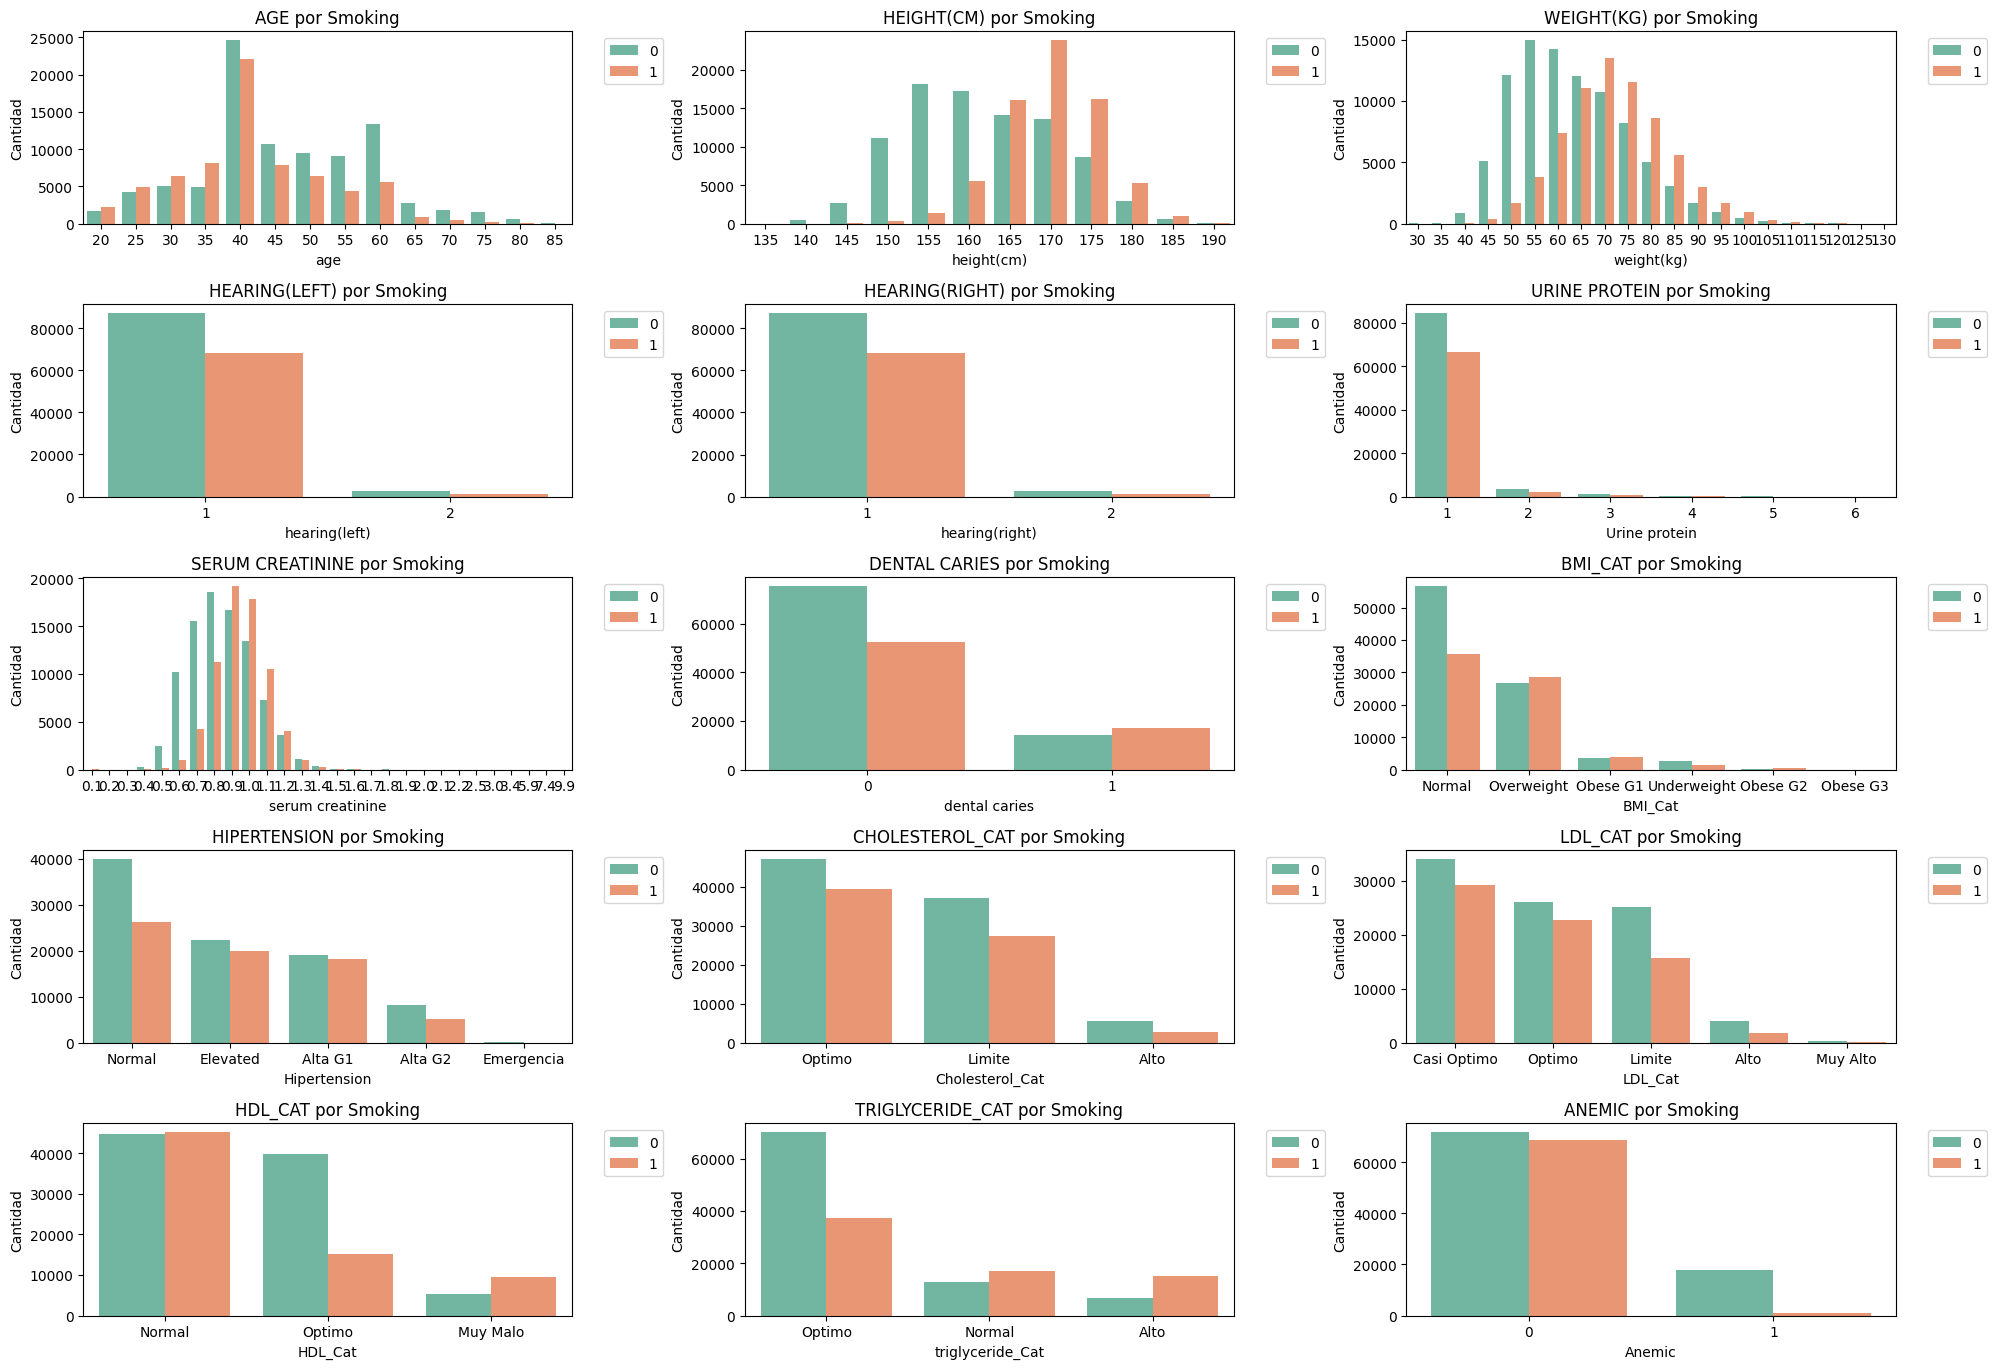

In [14]:
# Distribución de las variables discretas
num_plots = len(disc)  
num_rows = 5
num_cols = 3  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, var in enumerate(disc):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] 

    #print(df[var].describe(), "\n")  # Descripción de la variable
    df_cat=df.groupby('smoking')[var].value_counts().reset_index(name='Cantidad')
    sns.barplot(x=var, y="Cantidad", hue="smoking", data=df_cat,ax=ax,palette='Set2')

    ax.set_title(f"{var.upper()} por Smoking")  
    ax.set_xlabel(var)  
    ax.set_ylabel('Cantidad') 
    ax.set_ylim(bottom=0)  
    ax.legend( loc='upper right', bbox_to_anchor=(1.2, 1))  

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


Como se puede ver en el analisis de las variables las personas Fumadoras tienden a ser de menor edad, lo que implica que la esperanza de vida se reduce cuando uno fuma. Tambien se puede ver que las personas que fuman tienden a ser de mayor peso, esto se puede ver en la distribucion del peso y en el BMI, donde las personas que estan sobrepasadas de su peso optimo tienden a fumar mas, mientras que las personas que poseen un BMI normal, el mayor porcentaje de estas son no fumadoras. Tambien se puede apreciar que en la categoria "Muy Malo" del colesterol bueno (HDL), la mayoria de las personas son fumadoras.

### Variables Continuas

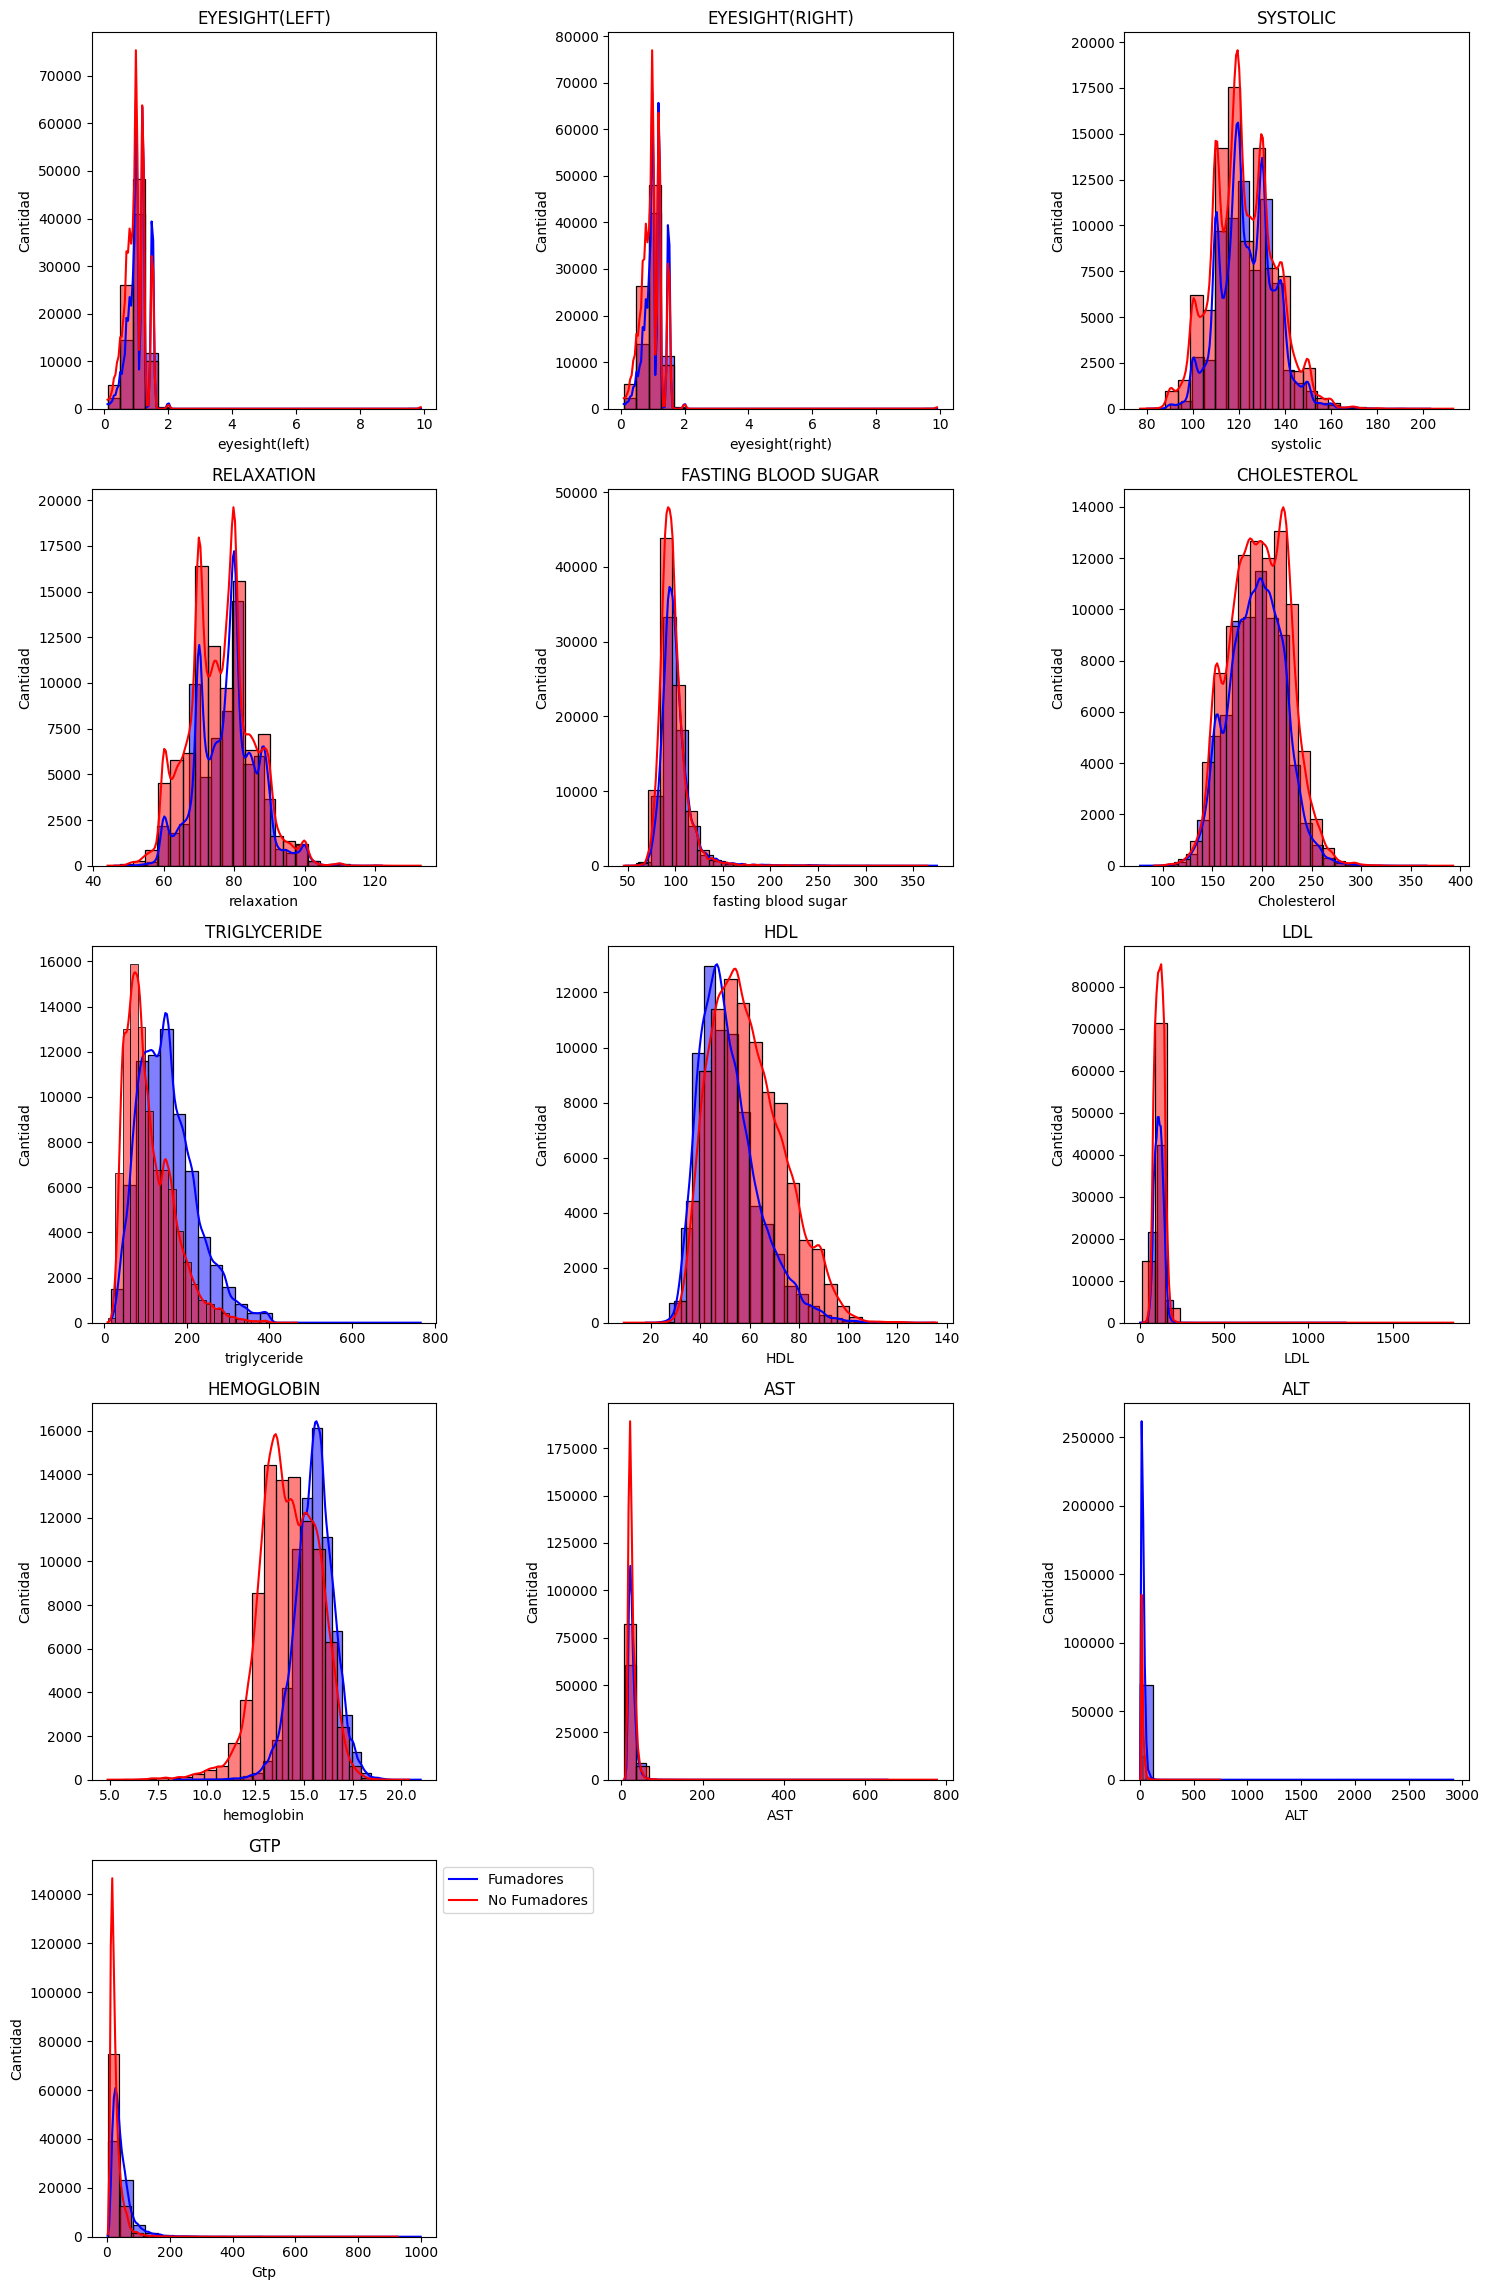

In [15]:
# Distribución de las variables continuas

num_variables = len(cont)
num_cols = 3  
num_rows = (num_variables - 1) // num_cols + 1  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  

for i, var in enumerate(cont):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    
    sns.histplot(data=df[df.smoking==1], x=var, color="blue", kde=True, bins=25, ax=ax)
    sns.histplot(data=df[df.smoking==0], x=var, color="red", kde=True, bins=25, ax=ax)
    
    ax.set_title(var.upper()) 
    ax.set_ylabel("Cantidad") 

for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.legend(["Fumadores", "No Fumadores"], bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Outliers

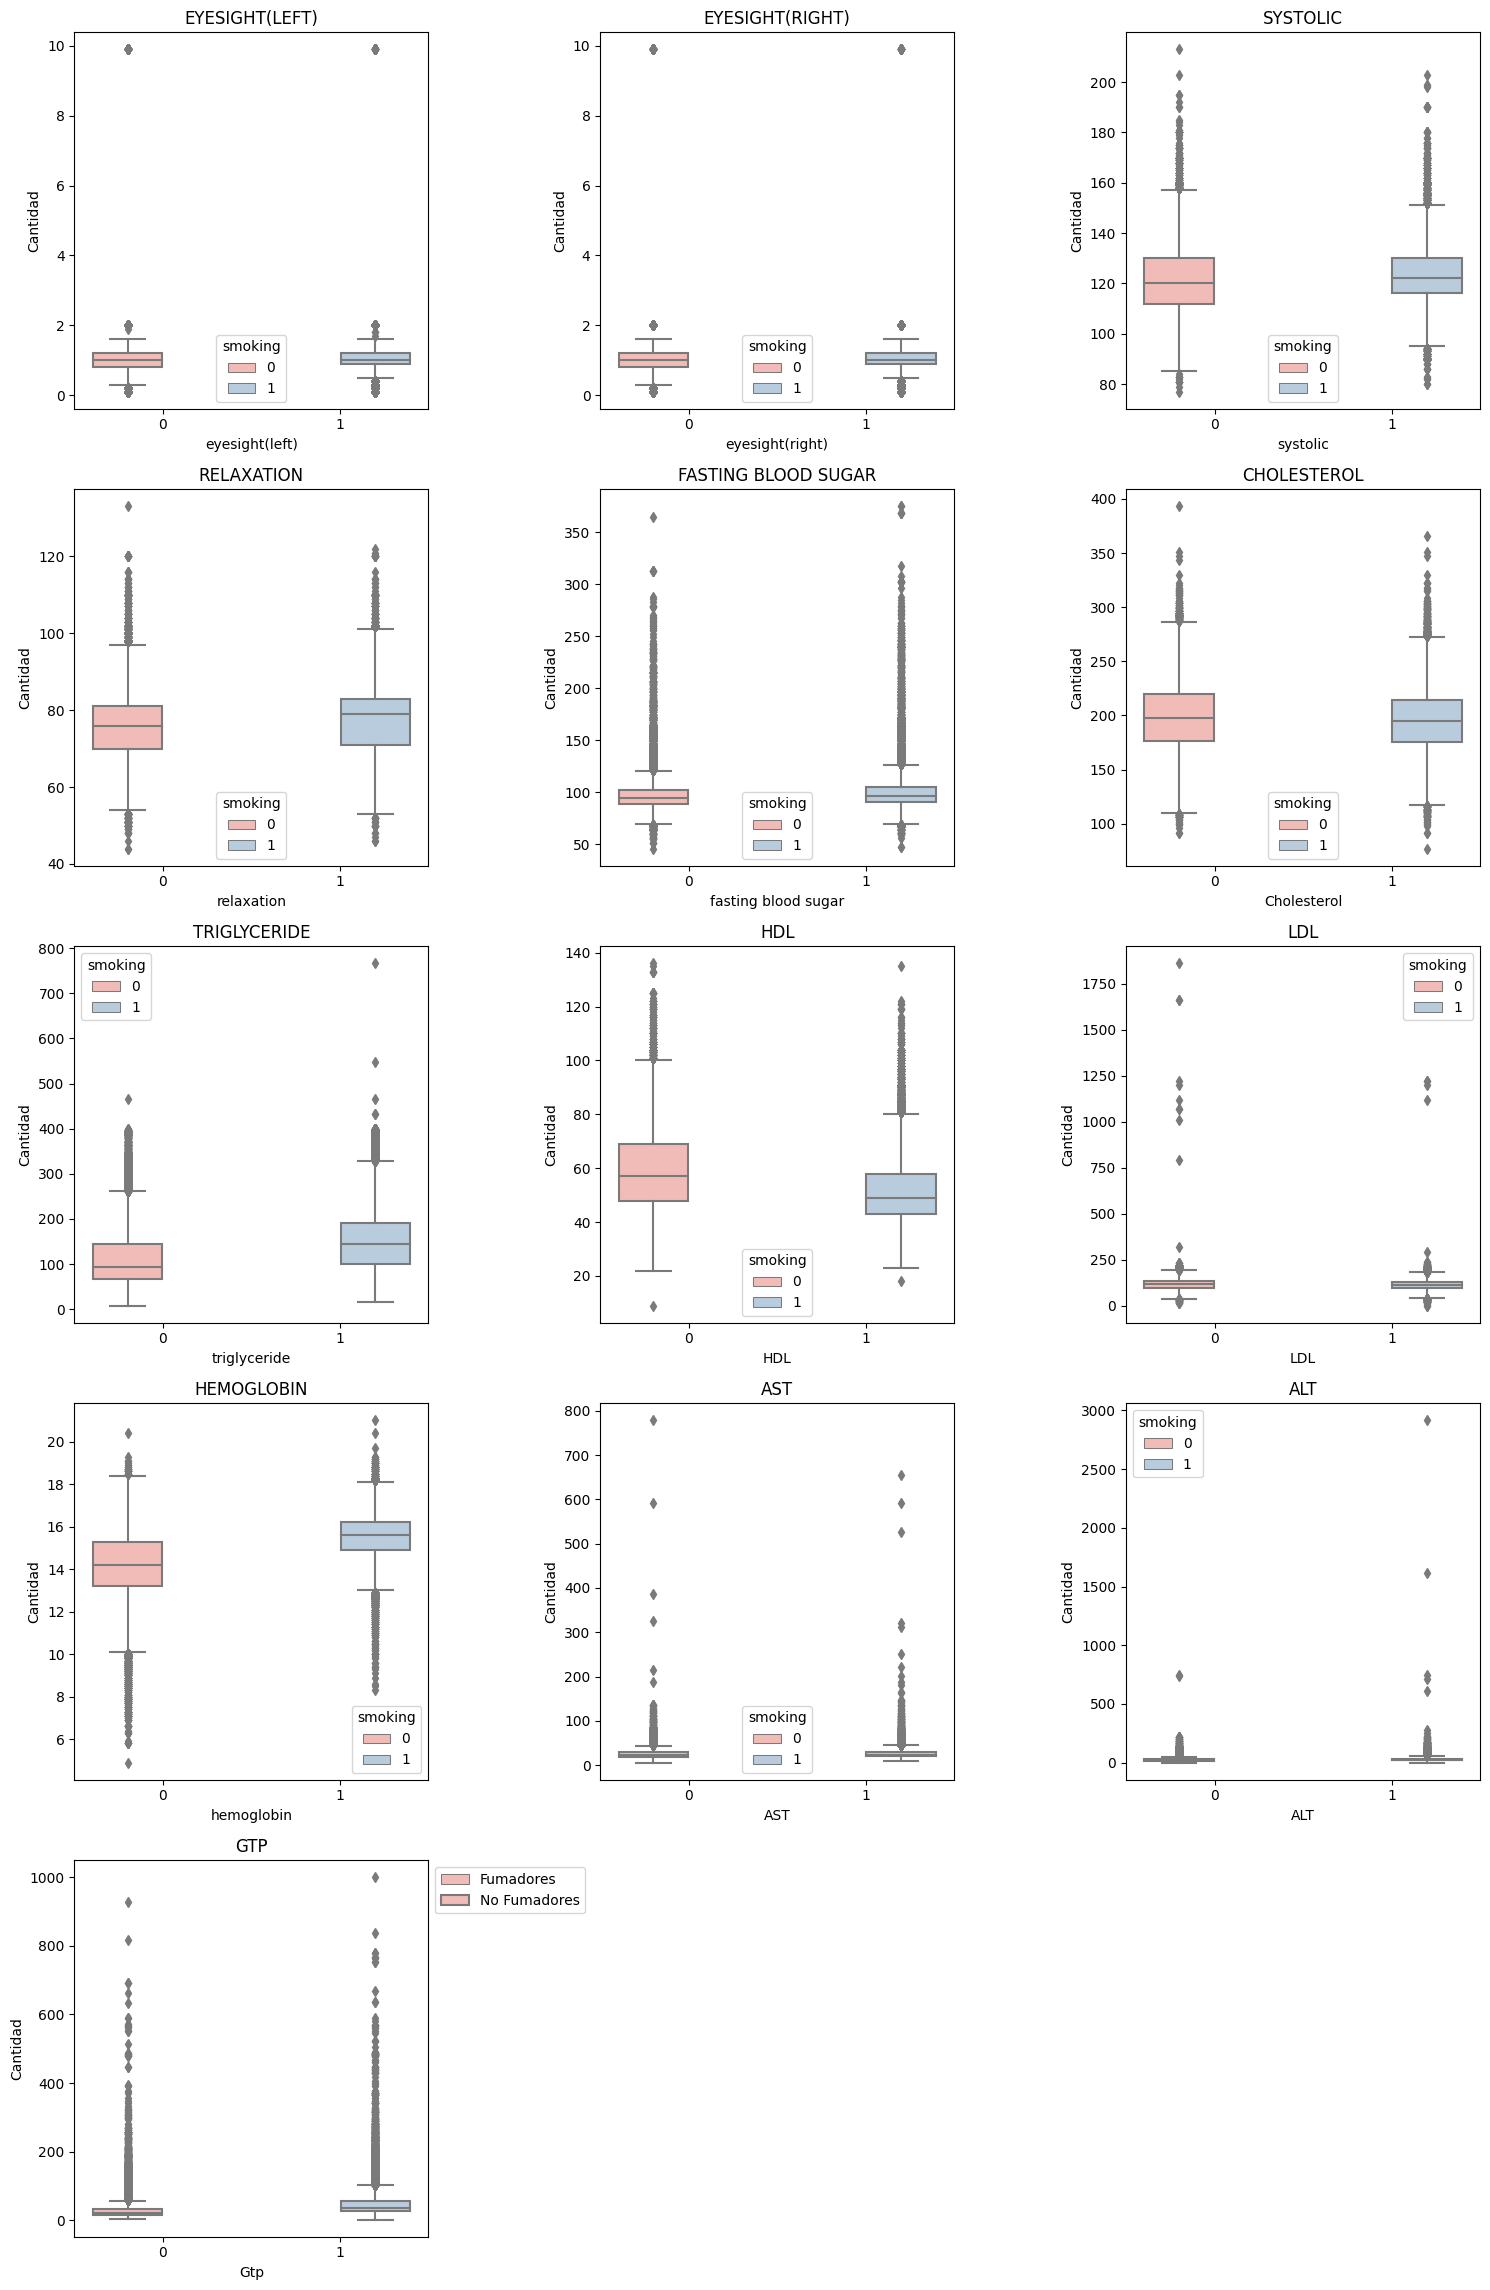

In [16]:
num_variables = len(cont)
num_cols = 3  
num_rows = (num_variables - 1) // num_cols + 1  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  

for i, var in enumerate(cont):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    
    sns.boxplot(y=var,x='smoking', hue="smoking", data=df[[var,'smoking']], palette="Pastel1", ax=ax)
    
    ax.set_title(var.upper()) 
    ax.set_ylabel("Cantidad") 
    ax.set_xlabel(var) 

for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.legend(["Fumadores", "No Fumadores"], bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede ver que muchas de las variables continuas poseen outliers. A partir de esto calculamos el porcentaje de outliers por cada variable

In [17]:
print('Porcentaje de outliers por variable:\n')
for var in cont:
    #df[var][df[var]%5!=0]=df[var][df[var]%5!=0].apply(lambda x:round(x/5)*5)
    print('-----------\n',var.upper(),'\n-----------')
    perc=len(outliers(df,var))/df.shape[0]
    print("Porcentaje de outliers: ",round(perc,2),'%\n')

Porcentaje de outliers por variable:

-----------
 EYESIGHT(LEFT) 
-----------
Porcentaje de outliers:  0.01 %

-----------
 EYESIGHT(RIGHT) 
-----------
Porcentaje de outliers:  0.02 %

-----------
 SYSTOLIC 
-----------
Porcentaje de outliers:  0.01 %

-----------
 RELAXATION 
-----------
Porcentaje de outliers:  0.01 %

-----------
 FASTING BLOOD SUGAR 
-----------
Porcentaje de outliers:  0.05 %

-----------
 CHOLESTEROL 
-----------
Porcentaje de outliers:  0.0 %

-----------
 TRIGLYCERIDE 
-----------
Porcentaje de outliers:  0.02 %

-----------
 HDL 
-----------
Porcentaje de outliers:  0.01 %

-----------
 LDL 
-----------
Porcentaje de outliers:  0.0 %

-----------
 HEMOGLOBIN 
-----------
Porcentaje de outliers:  0.01 %

-----------
 AST 
-----------
Porcentaje de outliers:  0.04 %

-----------
 ALT 
-----------
Porcentaje de outliers:  0.04 %

-----------
 GTP 
-----------
Porcentaje de outliers:  0.06 %



Debido a que los porcentajes son muy bajos, decidimos quedarnos con los outliers y analizar la distribucion de las variables sin ellos.

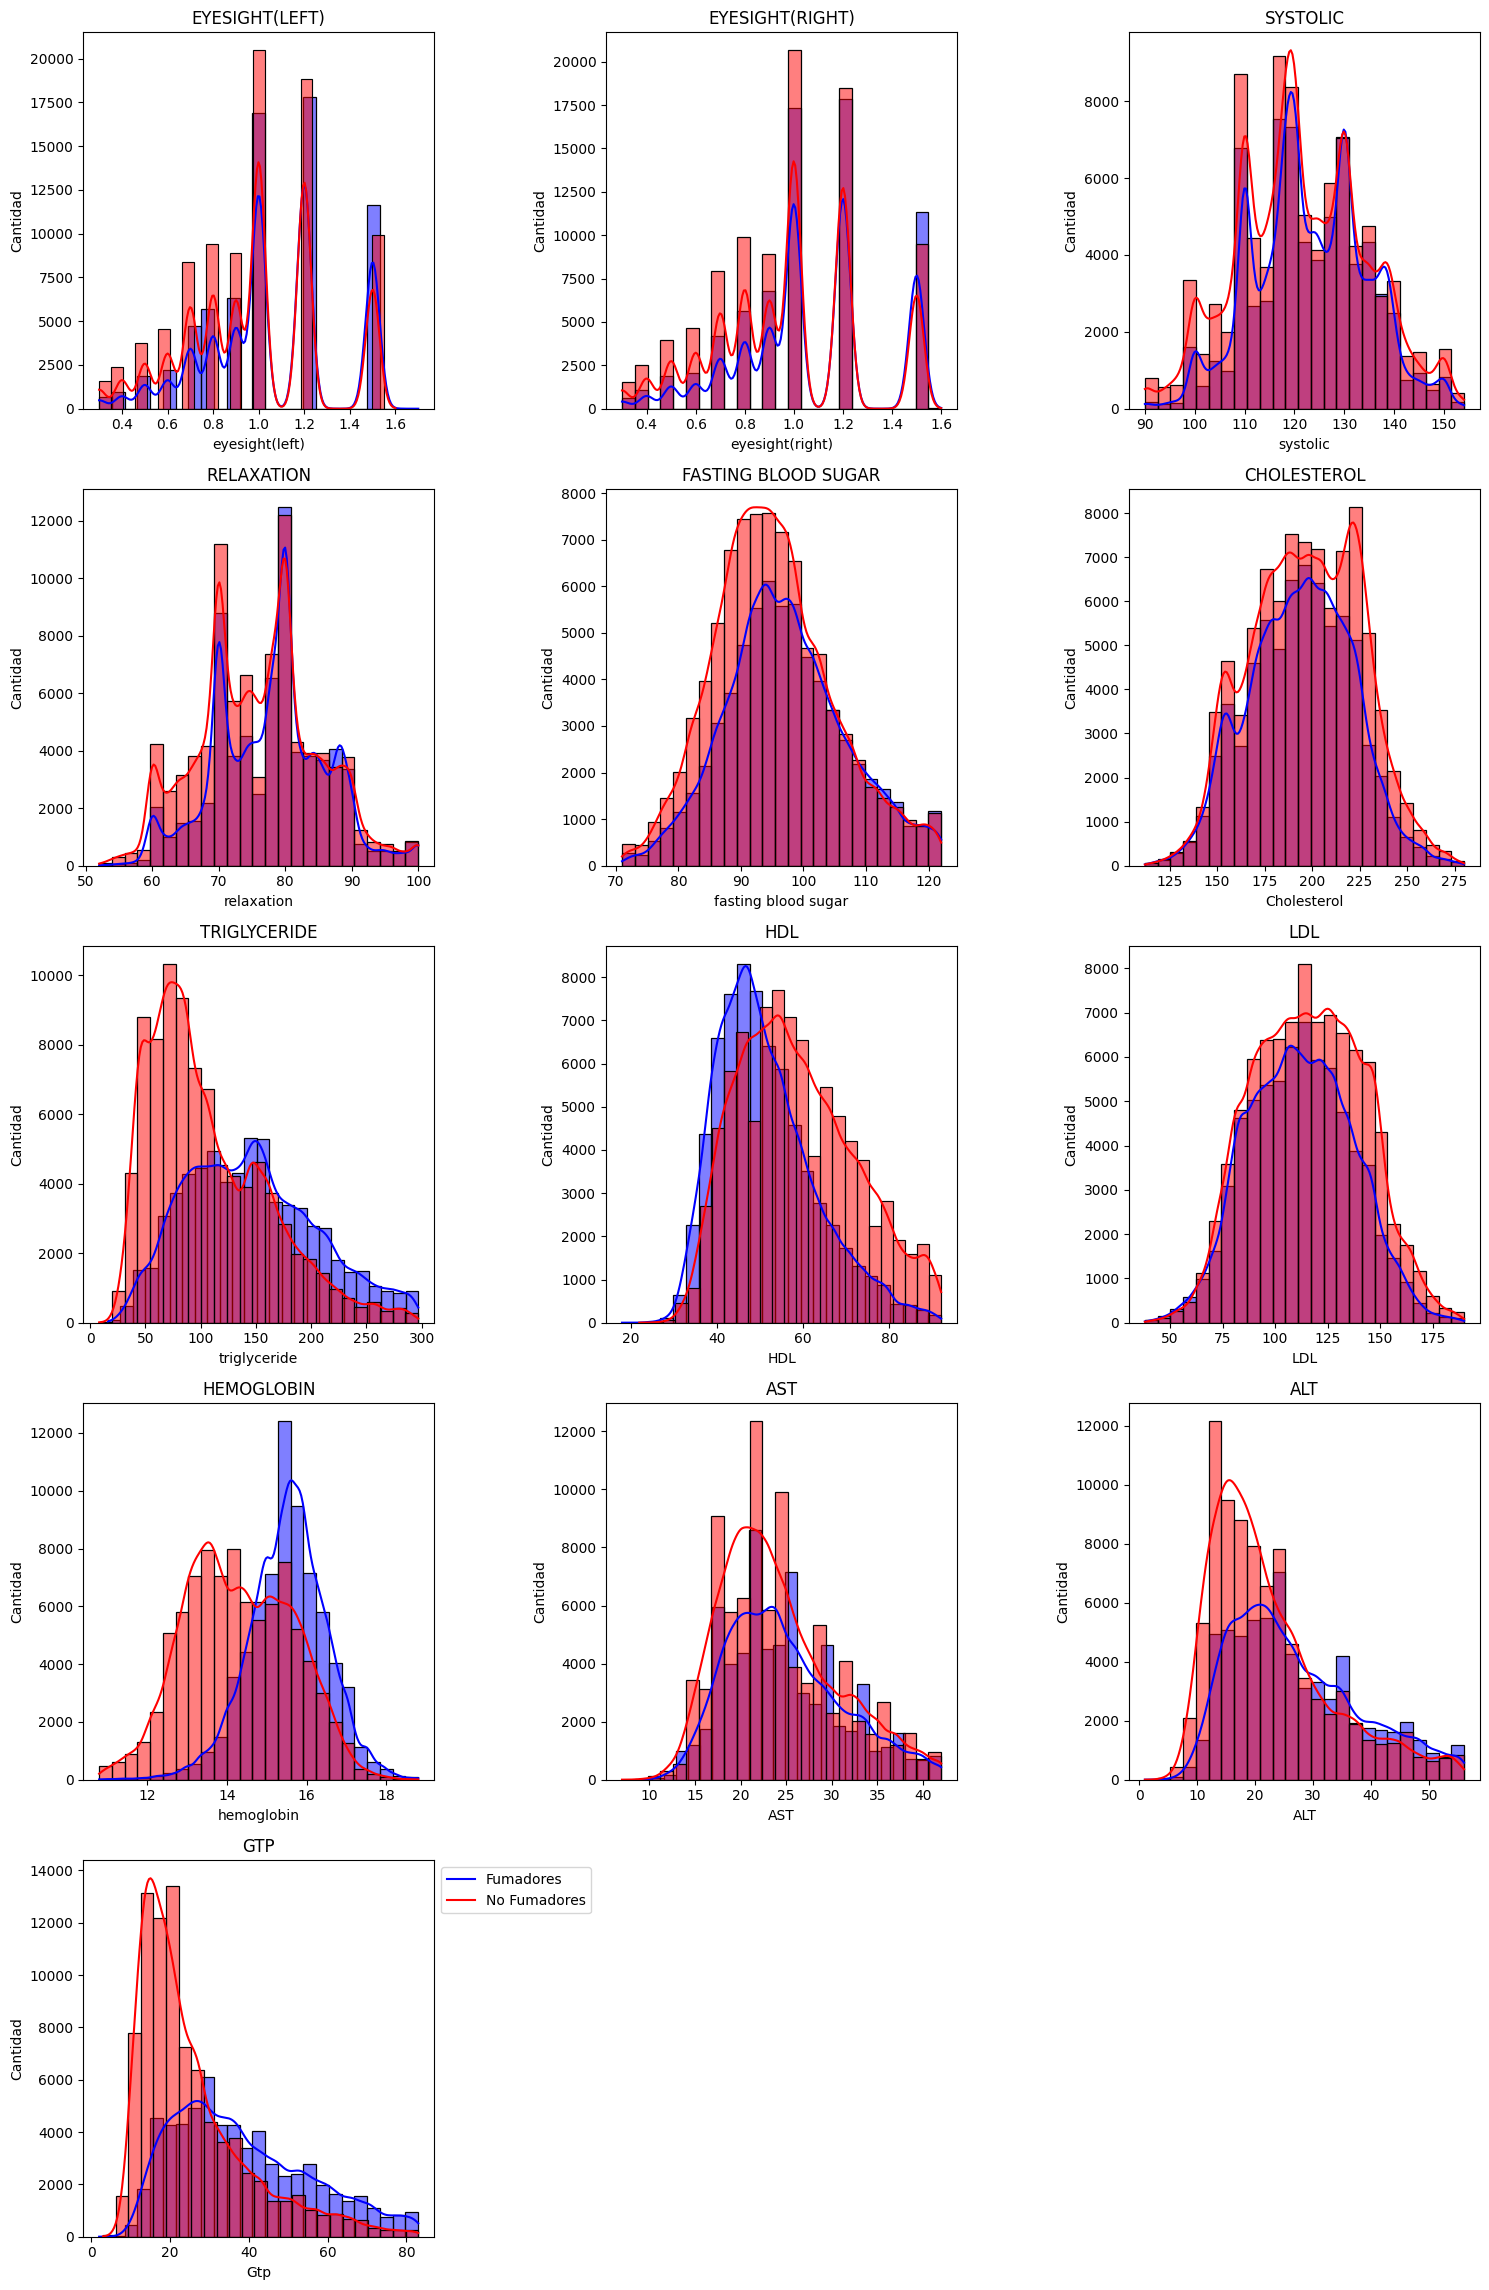

In [18]:
num_variables = len(cont)
num_cols = 3  
num_rows = (num_variables - 1) // num_cols + 1  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  

for i, var in enumerate(cont):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    
    df_out=df_without_outliers(df,var)
    sns.histplot(data=df_out[df_out.smoking==1], x=var, color="blue", kde=True, bins=25, ax=ax)
    sns.histplot(data=df_out[df_out.smoking==0], x=var, color="red", kde=True, bins=25, ax=ax)
    
    ax.set_title(var.upper()) 
    ax.set_ylabel("Cantidad") 

for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.legend(["Fumadores", "No Fumadores"], bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Haciendo el analisis de las distribuciones de las variables sin los outliers se puede identificar que muchas de estas variables siguen distribuciones parecidas. Se puede ver que los Fumadores tienen una distribucion normal respecto a los triglirecidos, presentan valores mas bajos en HDL (colesterol malo), tambien poseen valores mayores de hemoglobina. Por otro lado los No fumadores poseen en general tienen valores muchos mas bajos de GTP, una enzima que se encuentra en el higado y que a mayor valor mayor probabilidad de riesgo de poseer una enfermedad en dicha zona

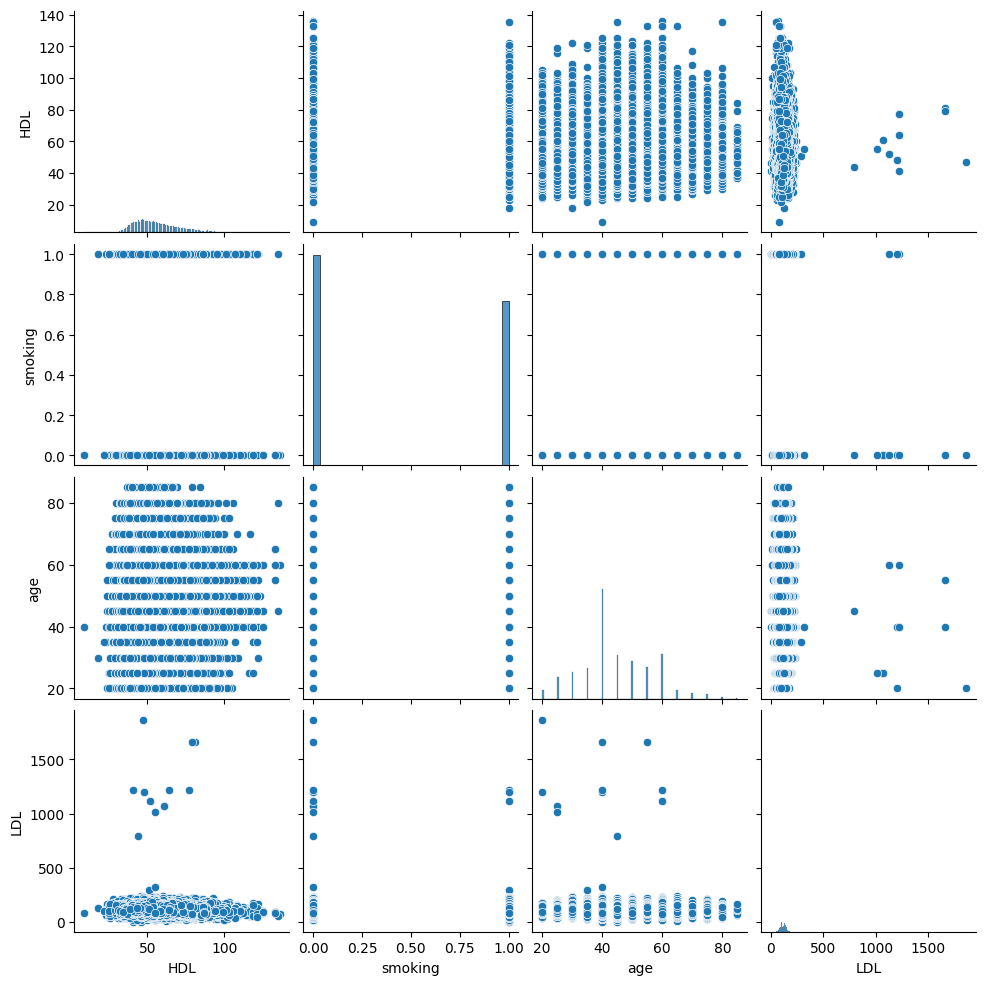

In [19]:
# Matriz de dispersión para visualizar la distribución conjunta entre las variables
variables = ['HDL', 'LDL', 'Cholesterol', 'triglyceride']
variables = ['HDL', 'smoking', 'age', 'LDL']

sns.pairplot(df[variables])
plt.show()

In [20]:
df.groupby('smoking').agg({'age':'mean',
                           'systolic':'mean',
                           'hemoglobin':'mean',
                           'Urine protein':'mean',
                           'hemoglobin':'mean',
                           'dental caries':pd.Series.mode,
                            'HDL':'median',
                            'LDL':'mean',
                            'ALT':'median',
                            'AST':'median'}).reset_index()

,smoking,age,systolic,hemoglobin,Urine protein,dental caries,HDL,LDL,ALT,AST
0,0,46.457819,121.845507,14.228271,1.082988,0,57.0,116.402308,20.0,23.0
1,1,41.539345,123.350294,15.528544,1.062969,0,49.0,112.299040,26.0,24.0


### Correlaciones

#### Correlaciones entre variables. 

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4836\1558014521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('id', axis = 1).corr('spearman'), cmap="mako")


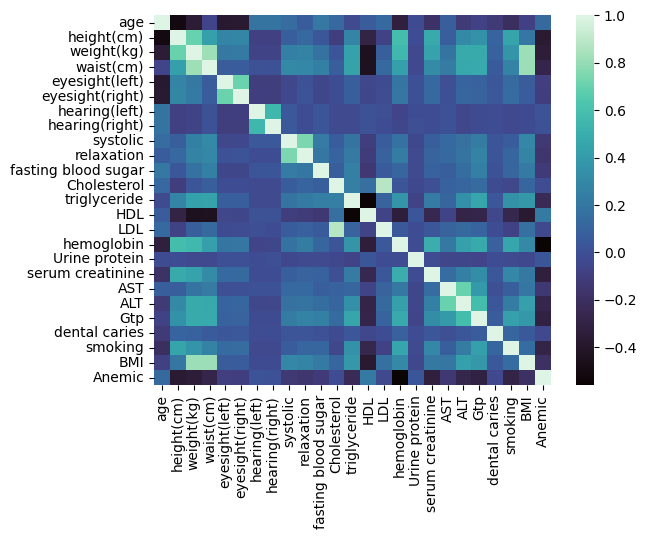

In [21]:
sns.heatmap(df.drop('id', axis = 1).corr('spearman'), cmap="mako")
plt.show()

Haciendo la matriz de correlacion, con Spearman, ya que es mas robusta a outliers y mide asociaciones monotonas. Podemos ver que hay correlacion negativa fuerte entre las variables de edad con la altura, el peso, la cintura y la hemoglobina, por lo que cuando la edad aumenta, estas variables tienden a bajar. Encontramos tambien una relacion negativa entre el HDL (colesterol bueno) y los triglirecidos, dos variables que influyen en el colesterol. 

Por otro lado podemos ver correlaciones positivas entre el peso y la altura, entre la capacidad de audicion derecha e izquierda, la presion sanguinea cuando el corazon late y relaxation (diastolica) que la mide entre dos latidos, y entre AST y ALT, dos enzimas que si tienen valores altos indican daños en el higado y pueden indicar la presencia o riesgo de una enfermedad en dicha zona. 

#### Analisis de variables categoricas con Smoking


Profundizaremos el analisis de las variables categoricas con la variable Smoking, principalmente las creadas por nosotros que incluyen a muchas de las variables numericas. Realizaremos un test de Chi-Cuadrado con el objetivo de analizar la independencia entre estas variables categoricas con la variable a predecir smoking.


In [22]:
cat=['BMI_Cat',
       'Hipertension', 'Cholesterol_Cat', 'LDL_Cat', 'HDL_Cat',
       'triglyceride_Cat', 'Anemic']

print('Test Chi-Cuadrado para variables categoricas')
print('Nivel de significacion: 1%')

for var in cat:
   cont=pd.crosstab(df['smoking'],df[var])
   chi2, p, dof, expected = chi2_contingency(cont)
   print('-----------\n',var.upper(),'\n-----------')
   print("Estadístico Chi-cuadrado:", chi2)
   print("Valor p:", round(p,5))
   if p<0.01:
      print("Se rechaza la Hipotesis Nula, hay dependencia entre Smoking y {}\n".format(var))
   else:
      print("No se rechaza la Hipotesis Nula, hay independencia entre Smoking y {}\n".format(var))

Test Chi-Cuadrado para variables categoricas
Nivel de significacion: 1%
-----------
 BMI_CAT 
-----------
Estadístico Chi-cuadrado: 2791.4412601627278
Valor p: 0.0
Se rechaza la Hipotesis Nula, hay dependencia entre Smoking y BMI_Cat

-----------
 HIPERTENSION 
-----------
Estadístico Chi-cuadrado: 1206.8744969285228
Valor p: 0.0
Se rechaza la Hipotesis Nula, hay dependencia entre Smoking y Hipertension

-----------
 CHOLESTEROL_CAT 
-----------
Estadístico Chi-cuadrado: 526.2755185572684
Valor p: 0.0
Se rechaza la Hipotesis Nula, hay dependencia entre Smoking y Cholesterol_Cat

-----------
 LDL_CAT 
-----------
Estadístico Chi-cuadrado: 1207.6037181305508
Valor p: 0.0
Se rechaza la Hipotesis Nula, hay dependencia entre Smoking y LDL_Cat

-----------
 HDL_CAT 
-----------
Estadístico Chi-cuadrado: 9821.38737931193
Valor p: 0.0
Se rechaza la Hipotesis Nula, hay dependencia entre Smoking y HDL_Cat

-----------
 TRIGLYCERIDE_CAT 
-----------
Estadístico Chi-cuadrado: 11611.625133633566
Va

Habiendo hecho los test de Chi Cuadrado de las variables creadas con la variable Smokig, confirmamos la dependencia entre las variables.

#### Fumador y No fumador

Realizamos un group-by por la variable smoking, sacando las medias de las variables mas relevantes por grupo con el objetivo de poder entender a la persona media fumadora y no fumadora y en que difieren principalmente

In [71]:
gb_smoker=df.groupby('smoking').agg({'age':'mean',
                           'systolic':'mean',
                           'relaxation':'mean',
                           'hemoglobin':'mean',
                           'Urine protein':'mean',
                           'AST':'median',
                           'BMI':'mean',
                           'Cholesterol':'mean',
                           'serum creatinine':'mean',
                           'Gtp':'median',
                           'weight(kg)':'mean'
}).reset_index()

gb_smoker.transpose()

,0,1
smoking,0.000000,1.000000
age,46.457819,41.539345
systolic,121.845507,123.350294
relaxation,76.005692,77.991171
hemoglobin,14.228271,15.528544
Urine protein,1.082988,1.062969
AST,23.000000,24.000000
BMI,24.031894,24.994334
Cholesterol,197.095477,194.124704
serum creatinine,0.849600,0.948292


Viendo estos datos, con la edad por ejemplo, podemos definir que las personas que fuman tienen una menor esperanza de vida. Por otro lado tambien podemos analizar el BMI, que calculamos haciendo el peso dividio la altura en metros cuadrados, podemos ver que los dos grupos estan en el rango Normal, aunque los fumadores se acercan mas al grupo de Sobrepeso. Analizando el colesterol y la hipertension, los dos grupos tienen valores normal y elevado respectivamente aunque en ambos casos el grupo de fumadores esta mas cerca de un grupo menos saludable. Analizando la hemoglobina en sangre, los fumadores tienen menos chances de ser anemicos, debido a una mayor exposicion de los individuos al monoxido de carbono. Para finalizar analizamos tambien el AST y el Gtp, dos enzimas en el higado que cuando tienen valores mas altos indican mayor riesgo de daño en el higado, y es en la ultima donde encontramos la mayor diferencia.